# 전처리

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import sklearn

In [ ]:
# 이미지의 가로 세로
IMG_SIZE = 224
# 비디오에서 학습할 프레임 개수
MAX_SEQ_LENGTH = 25

In [ ]:
# 데이터 경로
# data_path = "/content/drive/MyDrive/딥러닝프로젝트_1조/UCF101/"

data_path = "/content/drive/MyDrive/딥러닝프로젝트_1조/UCF101 top5/"

In [ ]:
# 학습 데이터의 파일명과 종류가 저장된 train.csv 를 읽음
train_df = pd.read_csv(data_path + "train.csv")


In [ ]:
# 비디오의 종류가 저장된 tag 컬럼을 label 컬럼에 대입
train_df["label"] = train_df["tag"]

In [ ]:
# label 컬럼에 저장된 데이터를 중복을 제거하고 조회
train_df["label"].unique()

array(['CricketShot', 'PlayingCello', 'Punch', 'ShavingBeard',
       'TennisSwing'], dtype=object)

In [ ]:
# enumerate(train_df["label"].unique()) : label 컬럼에 저장된 데이터를 중복을 제거한 값에 인덱스 추가
for index, data in enumerate(train_df["label"].unique()):
    # label 컬럼에 저장된 data 를 index로 변환
    train_df["label"].replace(data, index, inplace=True) 

In [ ]:
# sklearn.utils.shuffle(train_df) : train_df에 저장된 행을 섞음
train_df = sklearn.utils.shuffle(train_df)

In [ ]:
# 비디오를 구성하는 이미지의 가운데 부분을 리턴
# frame : 비디오를 구성하는 이미지
def crop_center_square(frame):
    # frame.shape[0:2] : 이미지의 세로, 가로 리턴
    y, x = frame.shape[0:2]
    # 이미지의 세로 가로 중에서 작은 값을 리턴
    min_dim = min(y, x)
    #이미지의 왼쪽 모서리 좌표의 가로 시작점
    # 이미지 가로 좌표 (이미지 가로 //2  - min_dim//2) ~ (이미지 가로 //2  + min_dim//2) 
    start_x = (x // 2) - (min_dim // 2)
    # 이미지의 왼쪽 모서리 세로 좌표 시작점
    # 이미지 세로 좌표 (이미지 세로 //2  - min_dim//2) ~ (이미지 세로 //2  + min_dim//2) 
    start_y = (y // 2) - (min_dim // 2)
    return frame[start_y : start_y + min_dim, start_x : start_x + min_dim]

In [ ]:
# 비디오 파일을 읽어서 각 프레임을 이미지로 변환해서 리턴
# path : 비디오 파일 경로
# max_frames : 이미지로 변환할 프레임수
# resize=(IMG_SIZE, IMG_SIZE) : 이미지의 가로 세로
def load_video(path, max_frames=25, resize=(IMG_SIZE, IMG_SIZE)):
    # 비디오 파일을 읽어서 이미지로 변환 할 객페
    cap = cv2.VideoCapture(path)
    frames = []
    try:
        while True:
            # cap.read() : 비디오를 읽어서 리턴
            # ret : 비디오 읽기가 성공했으면 True, 더이상 읽을 비디오 프레임이 없으면 False 가 리턴
            # frame : 비디오 프레임 이미지를 리턴
            ret, frame = cap.read()
            # ret 가 False면 반복 종료
            if not ret:
                break
            # 비디오 이미지를 가운데 리턴
            frame = crop_center_square(frame)
            #비디오 이미지의 가로 세로를 resize=(224,224) 로 변환
            frame = cv2.resize(frame, resize)
            # frame 은  [줄, 칸, B G R ] 로 구성되 있음 
            # frame [ : (모든줄), : (모든칸), R (인덱스2) G (인덱스1) B (인덱스0 )] 리턴
            frame = frame[:, :, [2, 1, 0]]
            # frame을 frames에 추가
            frames.append(frame)
            # frames에 저장된 데이터수가 max_frames와 같으면 종료
            if len(frames) == max_frames:
                break
    finally:
        # 비디오 이미지 변환 종료
        cap.release()
    # frames를 numpy 배열로 변환 해서 리턴
    return np.array(frames)


In [ ]:
# 비디오 파일의 프레임을 이미지로 변환해서 리턴
video = load_video(data_path+"train/"+train_df["video_name"].loc[0])

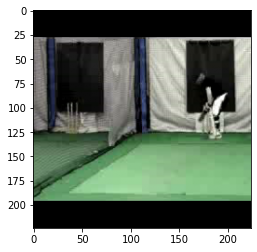

In [ ]:
# 첫번째 프레임 출력
plt.imshow(video[0]/255)

In [ ]:
# 비디오 파일의 종류를 2차원 배열로 변환
train_df["label"].values.reshape(-1,1)

array([[1],
       [0],
       [3],
       [1],
       [2],
       [3],
       [3],
       [1],
       [2],
       [0],
       [0],
       [2],
       [3],
       [4],
       [4],
       [3],
       [3],
       [2],
       [1],
       [1],
       [1],
       [2],
       [3],
       [4],
       [2],
       [1],
       [0],
       [1],
       [3],
       [1],
       [4],
       [2],
       [1],
       [4],
       [2],
       [1],
       [4],
       [3],
       [0],
       [2],
       [3],
       [4],
       [3],
       [2],
       [3],
       [0],
       [4],
       [2],
       [2],
       [2],
       [0],
       [3],
       [4],
       [1],
       [0],
       [3],
       [3],
       [3],
       [3],
       [3],
       [1],
       [4],
       [4],
       [3],
       [2],
       [0],
       [4],
       [0],
       [4],
       [4],
       [0],
       [2],
       [0],
       [1],
       [2],
       [1],
       [2],
       [4],
       [4],
       [3],
       [0],
       [3],
       [2],
    

In [ ]:
# 모든 비디오 파일의 이미지와 종류를 리턴
# video_name : 비디오 파일명
# label: 비디오 파일 종류
# root_dir : 비디오 파일 경로
def prepare_all_videos(video_name , label, root_dir):
    # 비디오 파일 이름의 개수
    num_samples = len(video_name)
    # video_name.values.tolist() : 비디오 파일 이름을 리스트로 변환 해서 리턴
    video_paths = video_name.values.tolist()
    # 비디오 종류를 리턴
    labels = label.values
    # 비디오 종류를 2차원 배열로 변환
    labels = labels.reshape(-1,1)
    # 0으로 초기화된 [비디오 파일개수 * 20 , 224 , 224, 3] 배열 생성
    x = np.zeros(shape=(num_samples*MAX_SEQ_LENGTH, IMG_SIZE, IMG_SIZE, 3 ), dtype="float32" )
    # 0으로 초기화된 [비디오파일개수 * 20] 인 배열 생성
    y = np.zeros(shape=(num_samples*MAX_SEQ_LENGTH), dtype="float32")
    # 인덱스 초기화
    index = 0
    # 비디오 파일의 개수 만큼 반복
    for idx, path in enumerate(video_paths):
        # 비디오 파일을 읽어서 각 프레임의 이미지를 리턴
        frames = load_video(root_dir+ path)
        # 프레임의 개수 만큼 반복
        for i in range(len(frames)):
            # frame의 i번째 이미지를 x에 추가
            x[index] = np.array(frames[i], dtype="float32")
            # 비디오의 종류가 저장된 labels의 idx 번째를 y에 추가
            y[index]= np.array(labels[idx], dtype="float32")
            # index 1 증가
            index += 1 
    
    # 전체 비디오 프레임을 이미지로 변환한 x 
    # to_categorical(y) : 이미지의 종류 y 를 onehot 인코딩 
    return (x,to_categorical(y))

In [ ]:
# 비디오 프레임을 이미지로 변환한 데이터를 X_train에 저장
# 비디오 프레임 이미지의 종류를 y_train에 저장
X_train, y_train = prepare_all_videos(train_df["video_name"], train_df["label"] , data_path + "train/")

In [ ]:
X_train.shape

(14850, 224, 224, 3)

In [ ]:
y_train.shape

(14850, 5)

In [ ]:
X_train[0].shape

(224, 224, 3)

#모델 생성

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

In [ ]:
# Xception : Xception 객체를 리턴
#include_top=True : 이미지넷 대회처럼 1000 가지 이미지로 분류 
#include_top=False : 이미지는 분류하지 않고  이미지의 특성을 추출하는 필터와 맥스풀링만 사용
# input_shape=(224, 224, 3) : 입력 이미지의 크기 224줄 224칸 3 컬러
Xception = Xception( include_top=False,input_shape=(224, 224, 3))

In [ ]:
# 이미지넷 대회에서 사용한 필터들의 값을 수정하지 않고 그대로 사용(Fine tunning)
Xception.trainable=False  # 동결!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
#입력값을 읽어서 예측을 할 Sequential 객체 생성
model = Sequential()

In [ ]:
#Xception 추가
model.add(Xception)
#선형 회귀를 하기 위해서 합성곱 연산을 수행한 결과를 1차원 배열로 변환
model.add(Flatten())
model.add(Dense(256, activation='selu',  kernel_initializer='lecun_normal'))
model.add(Dropout(0.8))
model.add(Dense(5, activation="softmax"))

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
Xception.trainable = True  # 모든 layer 동결해제

In [ ]:
Xception.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [ ]:
#  block14_sepconv2 (SeparableCon  (None, 7, 7, 2048)  3159552     ['block14_sepconv1_act[0][0]']   
#  v2D)                                                                                             
                                                                                                  
#  block14_sepconv2_bn (BatchNorm  (None, 7, 7, 2048)  8192        ['block14_sepconv2[0][0]']       
#  alization)                                                                                       
                                                                                                  
#  block14_sepconv2_act (Activati  (None, 7, 7, 2048)  0           ['block14_sepconv2_bn[0][0]']    
#  on)     


for layer in Xception.layers:
  if layer.name in ['block14_sepconv2','block14_sepconv2_bn','block14_sepconv2_act']:
    layer.trainable = True
  else:
    layer.trainable = False


In [ ]:
#GradientDecnet를 이용해서 w1,w2,w3,w4를 찾는 방법을 설정함
#loss='categorical_crossentropy' : -(y * tf.log(hypothesis1)) 합 이 최소가 되는 w1,w2,w3,w4 를 찾음
#optimizer=Adam(lr=1e-4) : learning rate를 0.0001 로 설정
model.compile(
                  loss="categorical_crossentropy", 
                   optimizer=Adam(lr=1e-4),
                   metrics=["acc"]
              )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


#이미지 증강

In [ ]:
# 이미지를 증강하는 ImageGenerator 객체 생성
train_datagen = ImageDataGenerator(
	rotation_range=30, # 이미지 회전 각도
	zoom_range=0.15, # 이미지 확대 비율
	width_shift_range=0.2, # 이미지 가로 이동 비율
	height_shift_range=0.2, # 이미지 세로 이동 비율
	shear_range=0.15, # 이미지 기울기 비율
	horizontal_flip=True,# 이미지 좌우 반전
	rescale=1/255 # 이미지에 1/255 를 곱해줌
	)

In [ ]:
index=0
#증강시킨 20개의 이미지를 저장할 리스트
all_generate_img=[]

#train_datagen.flow(X_train[0]) : X_train[0] 를 회전, 수평이동, 수직이동, 좌우반전, 상하 반전등으로 증강 시켜서 리턴
#generate_img : 증강 시킨 데이터가 저장됨
for generate_img in train_datagen.flow(X_train[0].reshape(-1, 224, 224,3) ):
    #all_generate_img.append(generate_img): generate_img 증강시킨 이미지를 all_generate_img 에 추가 
    all_generate_img.append(generate_img)
    index += 1
    if index > 20:
        break  

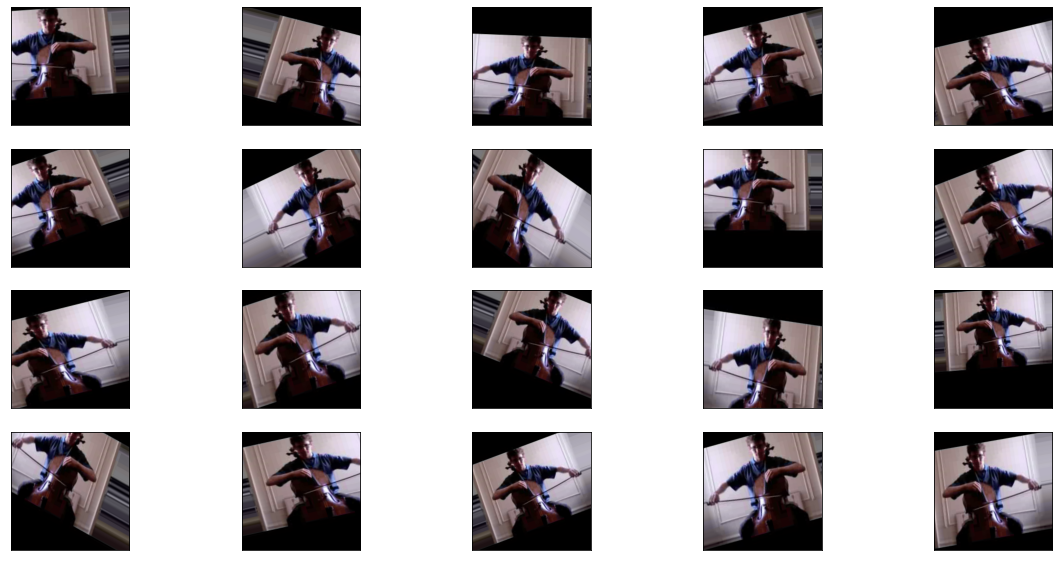

In [ ]:
#이미지를 출력할 객체

fig = plt.figure(figsize=(20, 10))

for i in range(20):
    #4줄 5칸으로 나누고 i+1번째 이미지를 그림
    subplot = fig.add_subplot(4, 5, i + 1)
    
    #subplot.set_xticks([]) : 그래프의 x축을 설정 
    #데이터가 없으므로 x축에 아무 데이터도 출력 안됨
    subplot.set_xticks([])
    
    #subplot.set_yticks([]) : 그래프의 y축을 설정 
    #데이터가 없으므로 y축에 아무 데이터도 출력 안됨
    subplot.set_yticks([])   
    
    #이미지 출력  (X_train[0]을 회전 이동으로 데이터가 많은것 같은 효과를 줌)
    subplot.imshow(all_generate_img[i][0])
#그래프를 화면에 그림
plt.show()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Early Stopping
es = EarlyStopping(monitor='loss',   # loss 더이상 감소되지 않을 경우 EarlyStopping을 적용
                   mode='auto', 
                   verbose=1, 
                   patience=1)
# 이미지 학습

history = model.fit(
	# 32개의 이미지씩 증강해서 학습  
	train_datagen.flow(X_train, y_train, batch_size = 32),
	epochs = 5,
	callbacks=[es],
	verbose=1) #  verbose=1 로 지정하면, 언제 keras 에서 training 을 멈추었는지를 화면에 출력

	# InceptionV3 loss:  0.1689 - acc: 0.9708



# Epoch 2/2
# 279/279 [==============================] - 121s 435ms/step - loss: 0.0844 - acc: 0.9763 # 기존 베이스라인

# Epoch 2/2
# 223/223 [==============================] - 100s 449ms/step - loss: 0.0118 - acc: 0.9968 # relu

# Epoch 2/2
# 279/279 [==============================] - 127s 455ms/step - loss: 0.0442 - acc: 0.9881  # selu  vgg 16 dropout 0.8

# Epoch 2/2
# 279/279 [==============================] - 127s 455ms/step - loss: 0.0442 - acc: 0.9881  # selu  vgg 16 dropout 0.5


Epoch 1/5
465/465 [==============================] - 237s 478ms/step - loss: 0.1591 - acc: 0.9624
Epoch 2/5
465/465 [==============================] - 225s 482ms/step - loss: 0.0440 - acc: 0.9908
Epoch 3/5
465/465 [==============================] - 221s 476ms/step - loss: 0.0324 - acc: 0.9935
Epoch 4/5
465/465 [==============================] - 224s 481ms/step - loss: 0.0176 - acc: 0.9967
Epoch 5/5
465/465 [==============================] - 223s 479ms/step - loss: 0.0139 - acc: 0.9968


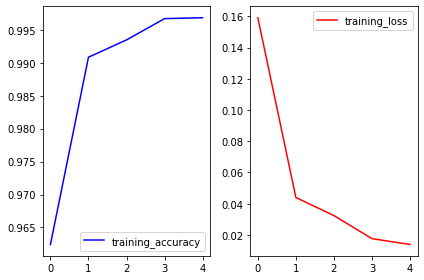

In [ ]:
# accuracy와 loss 비교

# train_acc = history.history['acc']
# train_loss = history.history['loss']


# fig = plt.figure()
# fig_1 = fig.add_subplot(1,2,1)

# fig_1.plot(train_acc, color='b', label='acc')

# fig_1.plot(train_loss, color='r', label='loss')

# fig_1.legend()

# plt.tight_layout()
# plt.show()


# accuracy와 loss 비교

train_acc = history.history['acc']
train_loss = history.history['loss']


fig = plt.figure()
fig_1 = fig.add_subplot(1,2,1)
fig_2 = fig.add_subplot(1,2,2)

fig_1.plot(train_acc, color='b', label='training_accuracy')
fig_1.legend()

fig_2.plot(train_loss, color='r', label='training_loss')
fig_2.legend()

plt.tight_layout()
plt.show()


In [ ]:
# 학습한 VGG16 모델 저장
model.save(data_path + "Eception123.h5")